# Network Science Book - Chap 5 - Degree Exponent in Different Barabasi-Albert Model Networks

###### From Network Science Book Section 5.5: the analytical calculations predict that the Barabási-Albert model generates a scale-free network with degree exponent γ=3. The degree exponent is independent of the m and m0 parameters. Furthermore, the degree distribution is stationary (i.e. time invariant), explaining why networks with different history, size and age develop a similar degree distribution

###### In this notebook, I test these claims with different configurations of Barabási-Albert mode using the PowerLow Lib and some distribution plots

###### The Lib and the plots are covered <a href='https://github.com/RodrigoHenriqueRamos/Complex-Networks/blob/main/Network%20Science%20Book%20-%20Chap%204%20-%20Scale%20Free%20Characterization%2C%20PowerLaw%20Lib.ipynb' >here</a>

code developed by Rodrigo Henrique Ramos <br>
rodrigohenrique.ramos@gmail.com

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import statistics as st
# Python Lib POWER LAW: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777 
import powerlaw

import warnings
warnings.filterwarnings('ignore')

### Creating Networks

In [2]:
random = nx.erdos_renyi_graph(10000,0.0004)
random.name='random'

scaleFree1=nx.barabasi_albert_graph(10000,1)
scaleFree1.name='scaleFree1'

scaleFree2=nx.barabasi_albert_graph(10000,2)
scaleFree2.name='scaleFree2'

scaleFree3=nx.barabasi_albert_graph(10000,3)
scaleFree3.name='scaleFree3'

scaleFree4=nx.barabasi_albert_graph(10000,4)
scaleFree4.name='scaleFree4'

scaleFree50=nx.barabasi_albert_graph(10000,50)
scaleFree50.name='scaleFree50'

print(nx.info(random),end='\n\n')
print(nx.info(scaleFree1),end='\n\n')
print(nx.info(scaleFree2),end='\n\n')
print(nx.info(scaleFree3),end='\n\n')
print(nx.info(scaleFree4),end='\n\n')
print(nx.info(scaleFree50),end='\n\n')

Name: random
Type: Graph
Number of nodes: 10000
Number of edges: 20079
Average degree:   4.0158

Name: scaleFree1
Type: Graph
Number of nodes: 10000
Number of edges: 9999
Average degree:   1.9998

Name: scaleFree2
Type: Graph
Number of nodes: 10000
Number of edges: 19996
Average degree:   3.9992

Name: scaleFree3
Type: Graph
Number of nodes: 10000
Number of edges: 29991
Average degree:   5.9982

Name: scaleFree4
Type: Graph
Number of nodes: 10000
Number of edges: 39984
Average degree:   7.9968

Name: scaleFree50
Type: Graph
Number of nodes: 10000
Number of edges: 497500
Average degree:  99.5000



### Functions

In [3]:
def scaleFreeMeasures(G):    
    degree=sorted(dict(G.degree()).values(),reverse=True)
    
    #Fitting with powerlaw lib #We let the lib choose the xmin
    fit = powerlaw.Fit(degree,verbose=False)
    # Comparing the distribution with a power law, and a exponential # R is the Ratio and p is the p-value
    R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)    
    
    #General information
    info={}
    info['N']=len(G.nodes) # Number of Nodes
    info['L']=len(G.edges) # Number of Edges
    info['<k>']= round(st.mean(degree),2) #Average degree
    info['<k2>']= round(st.variance(degree) + st.mean(degree)**2,2) #The 2 moment of the degree
    info['Kmax']= max(degree) #Biggest hub
    
    kmin=fit.power_law.xmin #Nodes with degree < than kmin are discarded from the distribution in order the find the gamma
    gamma=fit.power_law.alpha # Degree Exponent (after xmin)  
    info['kMinCut'] = kmin    
    info['PowerLawRatio'] = round(R,3)
    info['pValue'] = round(p,4)
    info['Gamma'] = round(gamma,3)
    return info


def scaleFreePlot(G,name=''): 
    degree=sorted(dict(G.degree()).values(),reverse=True)
    fit = powerlaw.Fit(degree,verbose=False)
    
    #Call the function to get the measures    
    info = scaleFreeMeasures(G)
    resume = str(info).replace('{','').replace('}','').replace('\'','').replace(',',' |')
    
    fig, ax = plt.subplots(2,2,figsize=(15, 15))
    fig.suptitle(name+'\n'+resume, fontsize=16)    
    ####-------------------PowerLaw Lib
    plt.sca(ax[0,0])
    ax[0,0] = fit.plot_pdf(color='b', linewidth=2)
    fit.power_law.plot_pdf(color='g', linestyle='--', ax=ax[0,0])
    ax[0,0].set_title('PowerLaw Fitting ')    
    # THE OTHERS PLOTS SHOW THE PROBABILITY OF EACH UNIQUE VALUE IN THE DISTRIBUTION HAPPENS
    #Frequence of each value
    freq={}
    length = len(degree)
    for v in degree:
        if(v in freq):
            freq[v]+=1
        else:
            freq[v]=1            
    #Probability of a 'd' value happens
    pk={}        
    for f in freq:
        pk[f]=freq[f]/length 
    x=list(pk.keys())
    y=list(pk.values())    
    ####-------------------Probability Linear
    plt.sca(ax[0,1])
    ax[0,1].plot(x,y,'.')
    ax[0,1].set_title('Probability Linear')
    ax[0,1].set_xlabel('K',fontsize=18)
    ax[0,1].set_ylabel(r'$p_k$',rotation = 0,fontsize=22)
    ####-------------------Probability LogLog
    plt.sca(ax[0,1])
    ax[1,0].loglog(x,y,'o')
    ax[1,0].set_title('Probability LogLog')
    ax[1,0].set_xlabel('K',fontsize=18)
    ax[1,0].set_ylabel(r'$p_k$',rotation = 0,fontsize=22)
    ####------------------Cumulative Probability
    plt.sca(ax[1,1])
    #cumulative degree distribution
    xAxes=[]
    yAxes=[]
    cum=0
    #pk was calculated above
    for k,v in pk.items():
        cum+=v
        xAxes.append(k)
        yAxes.append(cum)
    ax[1,1].loglog(xAxes,yAxes,'o')
    ax[1,1].set_title('Cumulative')
    ax[1,1].set_xlabel('K',fontsize=18)
    ax[1,1].set_ylabel(r'$p_k$',rotation = 0,fontsize=22)
    plt.show()

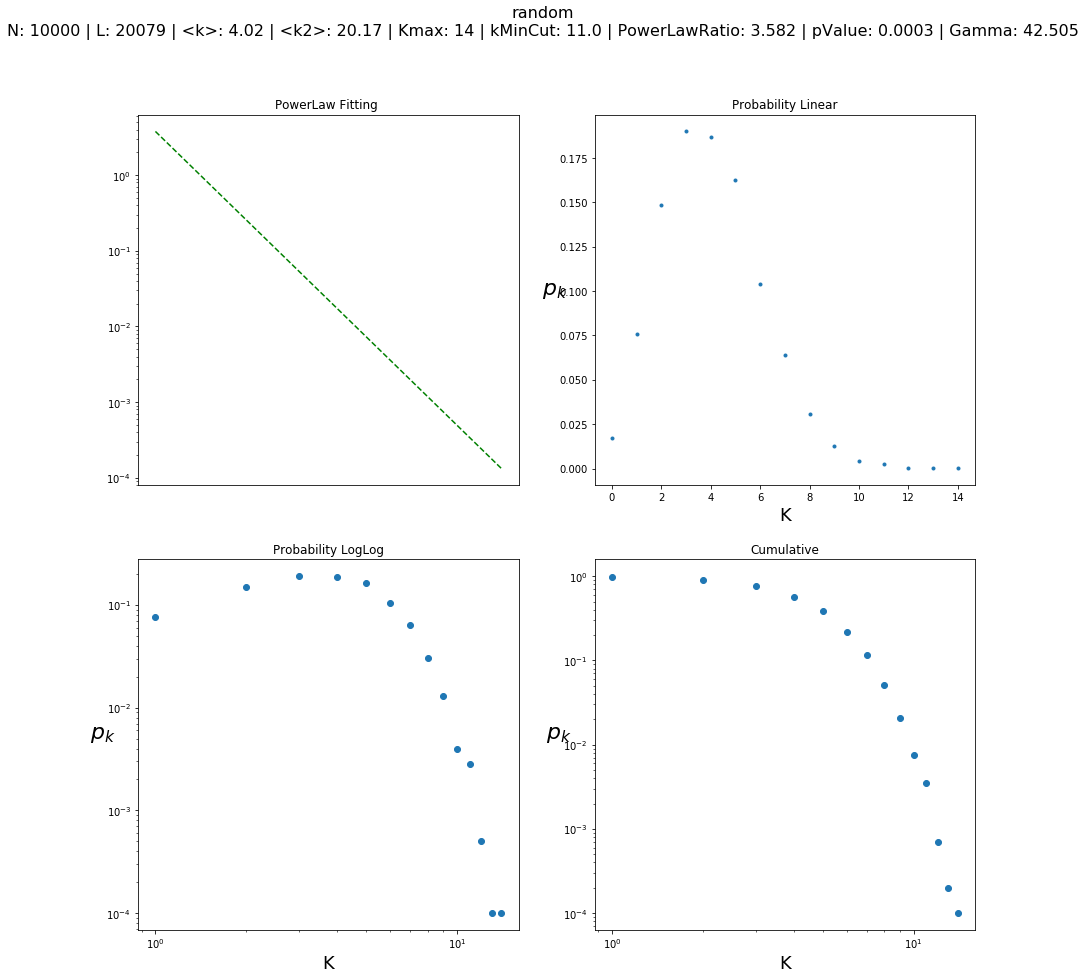

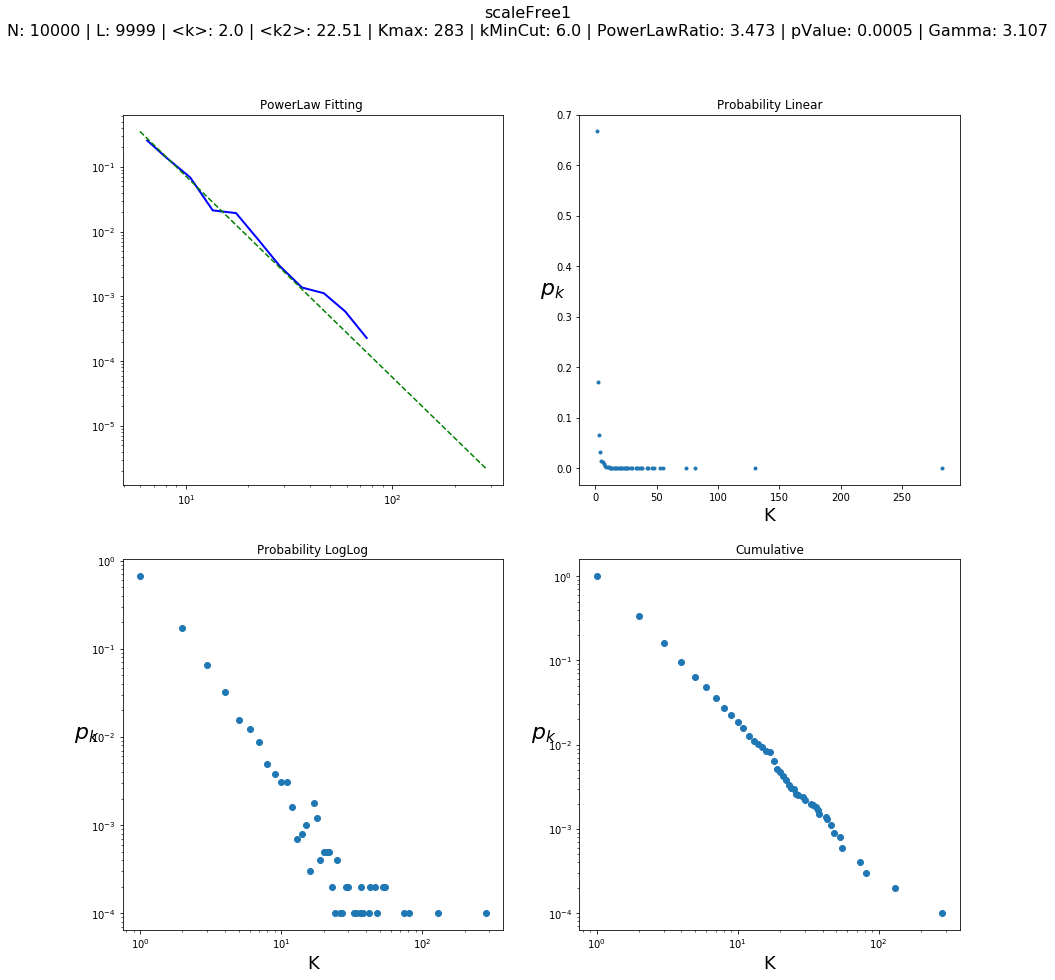

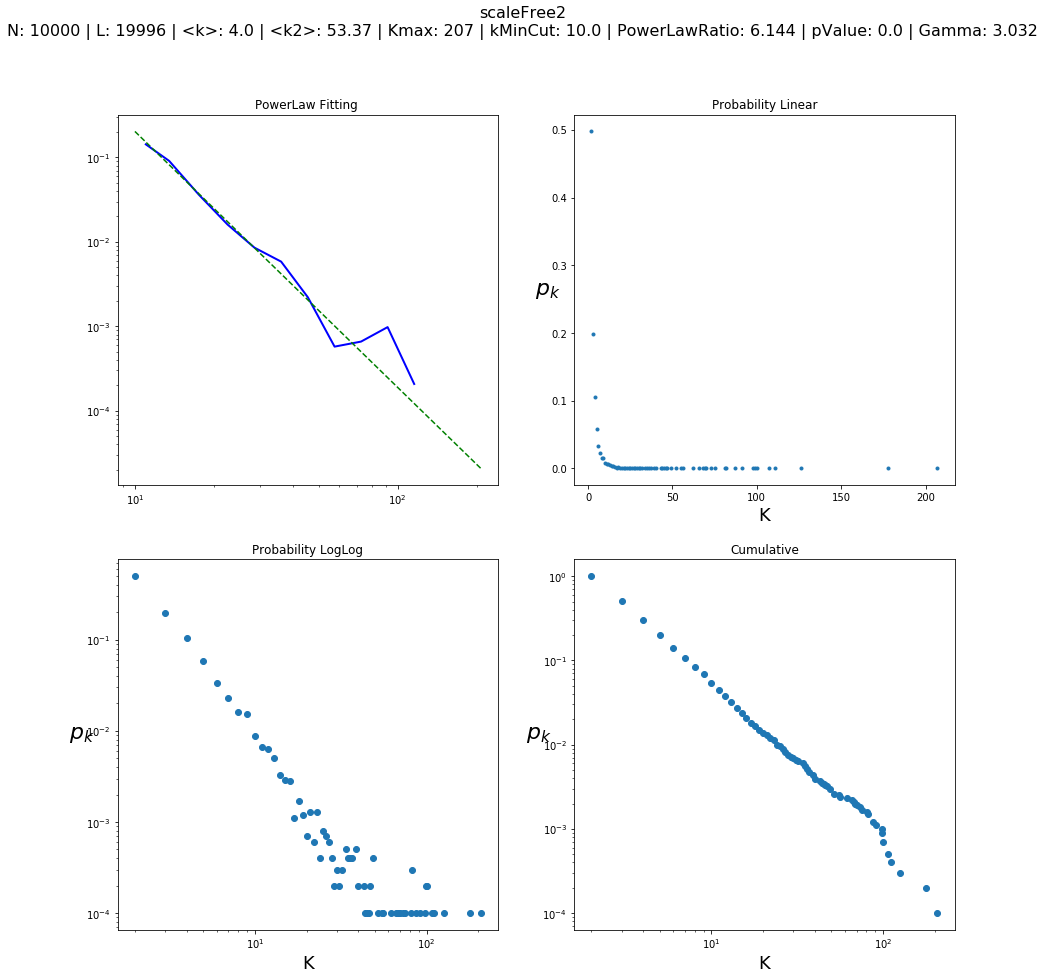

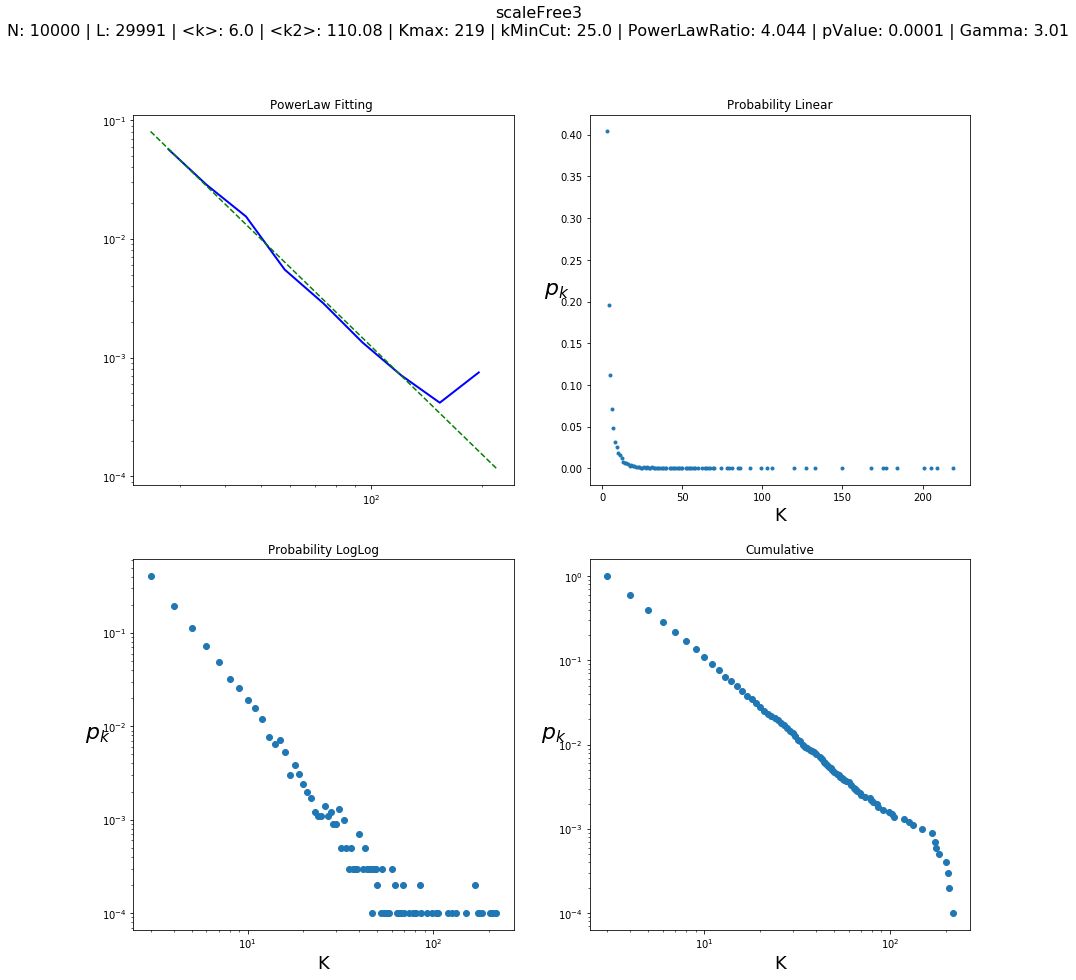

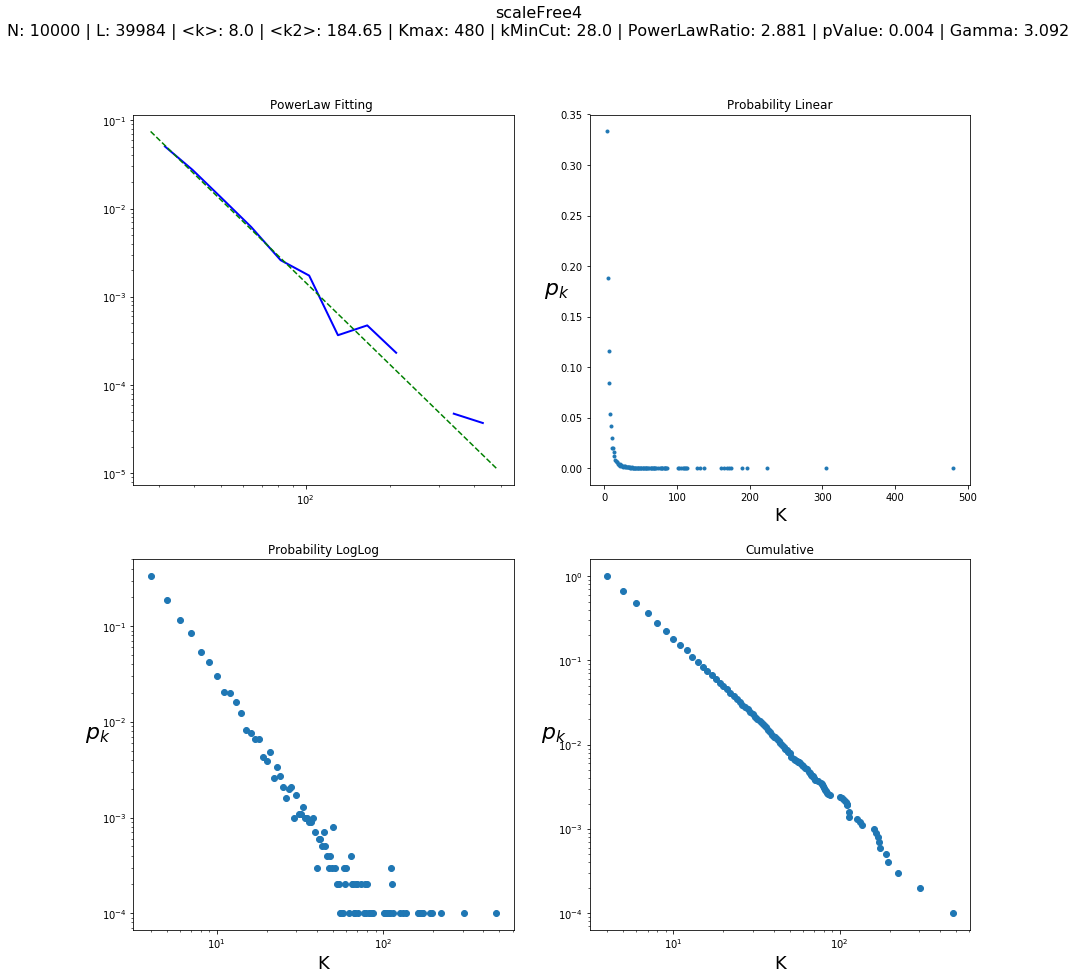

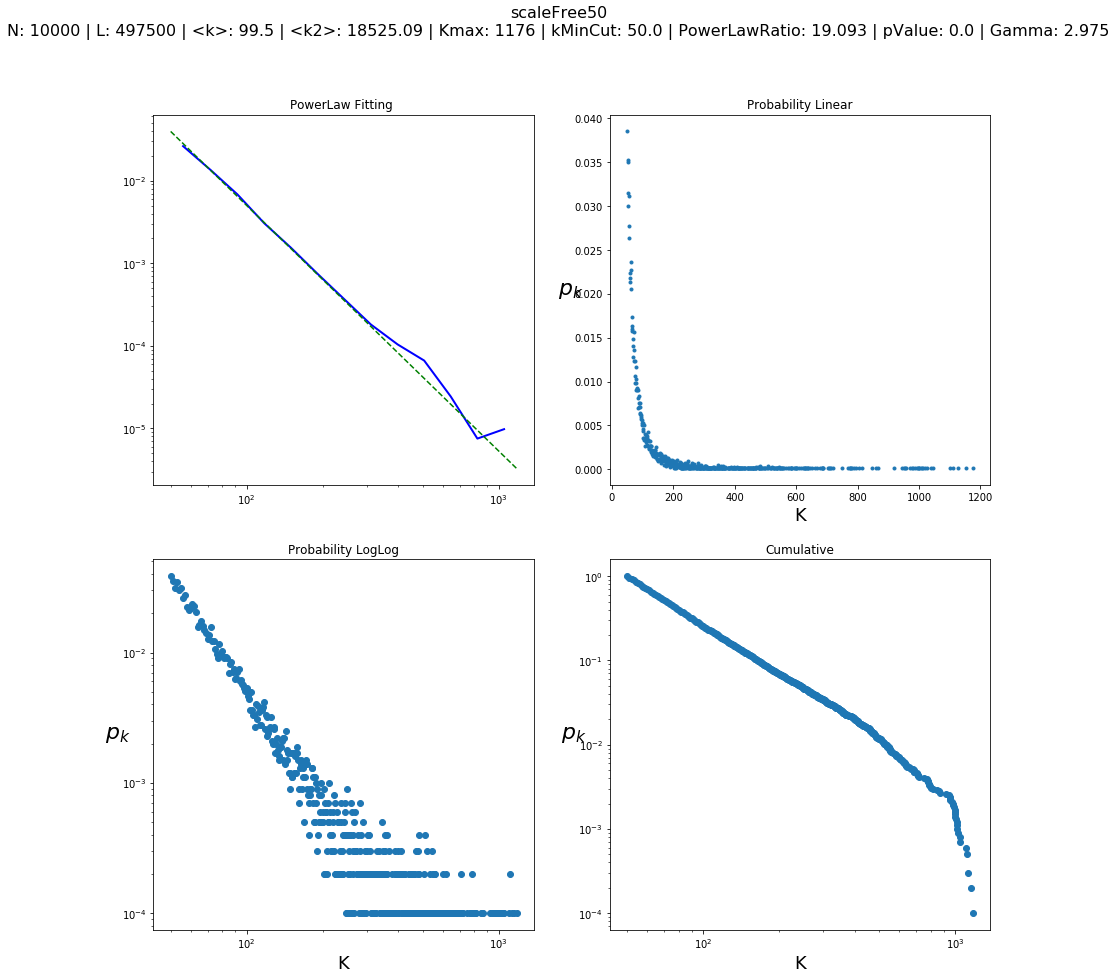

Wall time: 15.1 s


In [4]:
%%time
scaleFreePlot(random,'random')
scaleFreePlot(scaleFree1,'scaleFree1')
scaleFreePlot(scaleFree2,'scaleFree2')
scaleFreePlot(scaleFree3,'scaleFree3')
scaleFreePlot(scaleFree4,'scaleFree4')
scaleFreePlot(scaleFree50,'scaleFree50')